In [44]:
import pandas as pd

athelete = pd.read_csv("data\\athlete_events.csv")
regions = pd.read_csv("data\\noc_regions.csv")

In [45]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [46]:
athelete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [47]:
athelete = pd.concat([athelete, pd.get_dummies(athelete["Medal"])], axis=1)

In [48]:
athlete = athelete.merge(regions, on="NOC", how="left")

In [49]:
athlete = athlete[athlete["Season"] == "Summer"]

In [50]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,False,False,False,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,False,False,False,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,False,False,False,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,False,True,False,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,False,False,False,Netherlands,NaN


In [51]:
athlete.drop_duplicates(inplace=True)

In [52]:
medal_tally = athlete.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])

In [53]:
medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,False,False,False,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,False,False,False,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,False,False,False,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,False,True,False,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,False,False,False,Netherlands,NaN


In [54]:
medal_tally = medal_tally.groupby("NOC").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).head(10)

In [55]:
year = athlete["Year"].unique().tolist()
year.sort()
year.insert(0, "Overall")
year

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [56]:
import numpy as np

Country = np.unique(athlete["region"].dropna().values).tolist()
Country.sort()
Country.insert(0, "Overall")
Country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [57]:
test = athlete.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])

def year_and_countrywise_medal_tally(df, year, country):
    if year == "Overall" and country == "Overall":
        pass
    if year == "Overall" and country != "Overall":
        df = df[df["region"] == country]
    if year != "Overall" and country == "Overall":
        df = df[df["Year"] == year]
    if year != "Overall" and country != "Overall":
        df = df[(df["Year"] == year) & (df["region"] == country)]

    medal_tally = df.groupby("NOC").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).reset_index()
    medal_tally["Total"] = medal_tally["Gold"] + medal_tally["Silver"] + medal_tally["Bronze"]
    return medal_tally

In [58]:
nations_over_time = athlete.drop_duplicates(["Year", "region"])["Year"].value_counts().reset_index().sort_values("Year")

In [59]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import plotly.express as px
fig = px.line(nations_over_time, x = "Year", y = "count")
fig.show()

In [61]:
athlete.drop_duplicates(["Year", "Event"])["Year"].value_counts().reset_index().sort_values("Year")

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


<Axes: xlabel='Year', ylabel='Sport'>

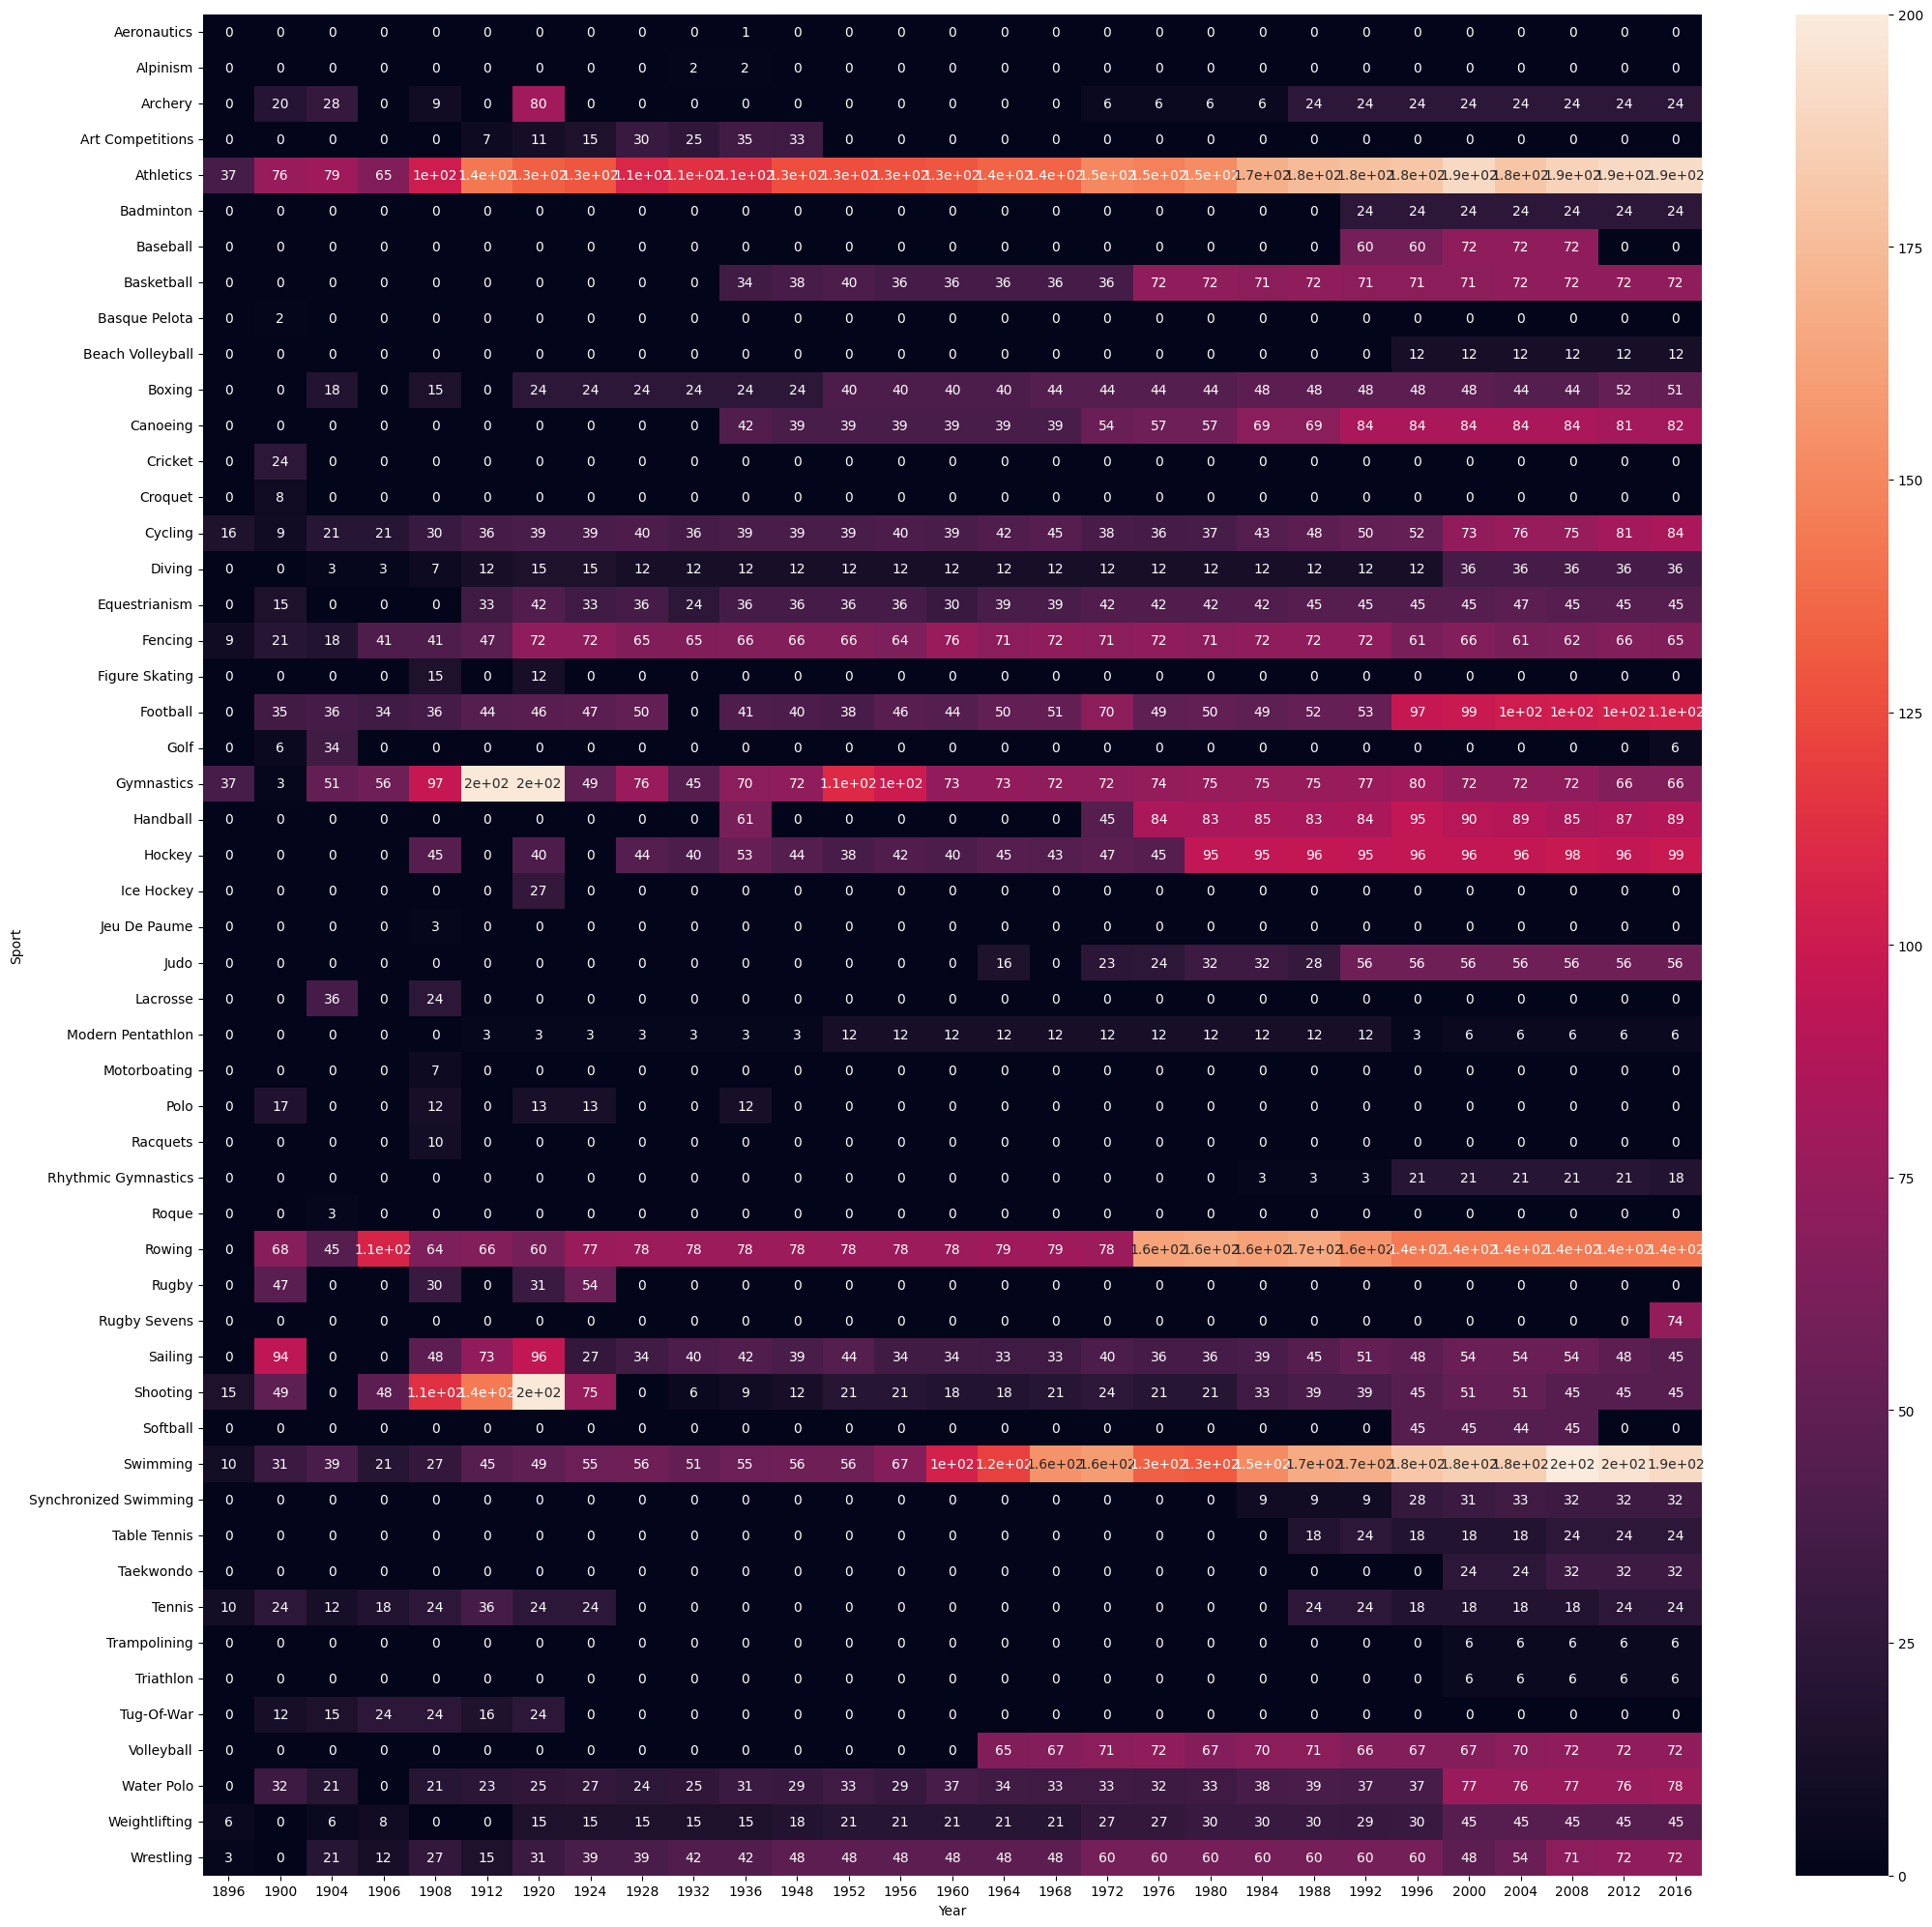

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
sns.heatmap(athlete.pivot_table(index="Sport", columns="Year", values="Medal", aggfunc="count").fillna(0).astype("int"), annot=True)

In [66]:
temp = athlete.dropna(subset=["Medal"])
temp["Name"].value_counts().reset_index().head(15).merge(temp, left_on="Name", right_on="Name", how="left")[["Name", "count", "Sport", "region"]].drop_duplicates("Name").reset_index()  

,index,Name,count,Sport,region
0,0,"Michael Fred Phelps, II",28,Swimming,USA
1,28,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
2,46,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
3,61,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
4,74,Takashi Ono,13,Gymnastics,Japan
5,87,Edoardo Mangiarotti,13,Fencing,Italy
6,100,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
7,112,Birgit Fischer-Schmidt,12,Canoeing,Germany
8,124,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
9,136,Ryan Steven Lochte,12,Swimming,USA


In [69]:
def most_successful_athletes(df, sport):
    df = df.dropna(subset=["Medal"])
    if sport != "Overall":
        df = df[df["Sport"] == sport]
    x = df["Name"].value_counts().reset_index().head(15).merge(df, left_on="Name", right_on="Name", how="left")[["Name", "count", "Sport", "region"]].drop_duplicates("Name")
    return x

most_successful_athletes(athlete, "Gymnastics")

,Name,count,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
18,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
33,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
46,Takashi Ono,13,Gymnastics,Japan
59,Sawao Kato,12,Gymnastics,Japan
71,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
83,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
94,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
105,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia
115,Polina Hryhorivna Astakhova,10,Gymnastics,Russia
